<a href="https://colab.research.google.com/github/1tach1271/Objecti-Detection-for-Blind-Assistance/blob/main/Object_Detection_for_Blind_Assistance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow opencv-python-headless matplotlib gTTS


In [ ]:
import tensorflow as tf
import numpy as np
import cv2
import matplotlib.pyplot as plt
from gtts import gTTS
import os
import IPython.display as ipd

In [ ]:
import tensorflow_hub as hub
model_url = 'https://tfhub.dev/tensorflow/ssd_mobilenet_v2/2'
model = hub.load(model_url)

In [ ]:
from google.colab import files
uploaded = files.upload()
for filename in uploaded.keys():
    print(f'Uploaded file: {filename}')

Saving istockphoto-127825105-612x612.jpg to istockphoto-127825105-612x612.jpg
Uploaded file: istockphoto-127825105-612x612.jpg


In [ ]:
image_path = 'istockphoto-127825105-612x612.jpg'
image = cv2.imread(image_path)
image_resized = cv2.resize(image, (300, 300))
image_uint8 = np.array(image_resized, dtype=np.uint8)
image_batch = np.expand_dims(image_uint8, axis=0)
image_tensor = tf.convert_to_tensor(image_batch, dtype=tf.uint8)

In [ ]:
output = model(image_tensor)
detection_boxes = output['detection_boxes'][0].numpy()
detection_classes = output['detection_classes'][0].numpy().astype(int)
detection_scores = output['detection_scores'][0].numpy()
threshold = 0.4
valid_boxes = detection_scores > threshold
detection_boxes = detection_boxes[valid_boxes]
detection_classes = detection_classes[valid_boxes]
detection_scores = detection_scores[valid_boxes]

In [ ]:
LABELS = {
    1: 'person', 2: 'bicycle', 3: 'car', 4: 'motorcycle', 5: 'airplane',
    6: 'bus', 7: 'train', 8: 'truck', 9: 'boat', 10: 'traffic light',
    11: 'fire hydrant', 12: 'N/A', 13: 'stop sign', 14: 'parking meter',
    15: 'bench', 16: 'bird', 17: 'cat', 18: 'dog', 19: 'horse', 20: 'sheep',
    21: 'cow', 22: 'elephant', 23: 'bear', 24: 'zebra', 25: 'giraffe',
    27: 'backpack', 28: 'umbrella', 31: 'handbag', 32: 'tie', 33: 'suitcase',
    34: 'frisbee', 35: 'skis', 36: 'snowboard', 37: 'sports ball', 38: 'kite',
    39: 'baseball bat', 40: 'baseball glove', 41: 'skateboard', 42: 'surfboard',
    43: 'tennis racket', 44: 'bottle', 46: 'wine glass', 47: 'cup', 48: 'fork',
    49: 'knife', 50: 'spoon', 51: 'bowl', 52: 'banana', 53: 'apple', 54: 'sandwich',
    55: 'orange', 56: 'broccoli', 57: 'carrot', 58: 'hot dog', 59: 'pizza', 60: 'donut',
    61: 'cake', 62: 'chair', 63: 'couch', 64: 'potted plant', 65: 'bed', 67: 'dining table',
    70: 'toilet', 72: 'tv', 73: 'laptop', 74: 'mouse', 75: 'remote', 76: 'keyboard',
    77: 'cell phone', 78: 'microwave', 79: 'oven', 80: 'toaster', 81: 'sink', 82: 'refrigerator',
    84: 'book', 85: 'clock', 86: 'vase', 87: 'scissors', 88: 'teddy bear', 89: 'hair drier',
    90: 'toothbrush'
}#have to add more labels according to the need

In [ ]:
for cls, score in zip(detection_classes, detection_scores):
    print(f"Class ID: {cls}, Score: {score}")

Class ID: 1, Score: 0.4580589234828949
Class ID: 1, Score: 0.43503352999687195
Class ID: 38, Score: 0.41347503662109375
Class ID: 37, Score: 0.4098092019557953


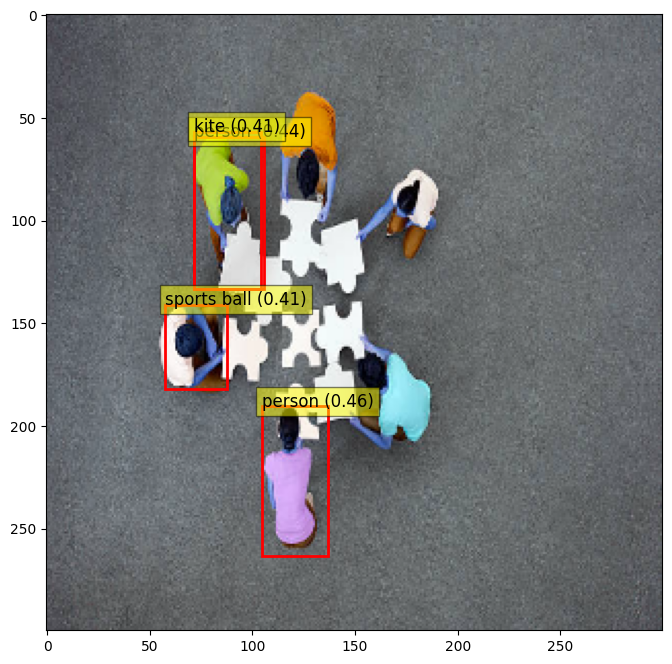

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.imshow(image_resized)
for box, cls, score in zip(detection_boxes, detection_classes, detection_scores):
    y1, x1, y2, x2 = box
    ax.add_patch(plt.Rectangle((x1 * 300, y1 * 300), (x2 - x1) * 300, (y2 - y1) * 300,
                               fill=False, color='red', linewidth=2))
    ax.text(x1 * 300, y1 * 300, f'{LABELS.get(cls, "Unknown")} ({score:.2f})',
            bbox=dict(facecolor='yellow', alpha=0.5), fontsize=12, color='black')
plt.show()

In [ ]:
detected_objects = [LABELS.get(cls, "Unknown") for cls in detection_classes]
detected_objects_str = ", ".join(detected_objects)
tts = gTTS(f"Detected objects: {detected_objects_str}", lang='en')
tts.save("detected_objects.mp3")
ipd.Audio("detected_objects.mp3")